Observed: k=97, n=100, MLE p̂ = 0.9700

Likelihoods and tail probs for candidate p's:
     p        PMF (k)          P(X >= k)       log-likelihood
  0.90      5.892e-03          7.836e-03              -5.1342
  0.92      2.543e-02          3.671e-02              -3.6717
  0.94      8.641e-02          1.430e-01              -2.4486
  0.95      1.396e-01          2.578e-01              -1.9691
  0.96      1.973e-01          4.295e-01              -1.6229
  0.97      2.275e-01          6.472e-01              -1.4807
  0.98      1.823e-01          8.590e-01              -1.7022
  0.99      6.100e-02          9.816e-01              -2.7969

Saved simulated histograms to 'advertising_binomial_hist_simulations.png'

Confidence intervals (95%):
Normal approx CI: [0.9366, 1.0034]
Wilson    CI:     [0.9155, 0.9897]

One-sided tail probabilities P(X >= 97):
 p=0.90 -> P(X >= 97) = 7.8365e-03
 p=0.92 -> P(X >= 97) = 3.6706e-02
 p=0.94 -> P(X >= 97) = 1.4302e-01
 p=0.95 -> P(X >= 97) = 2.5784e-01


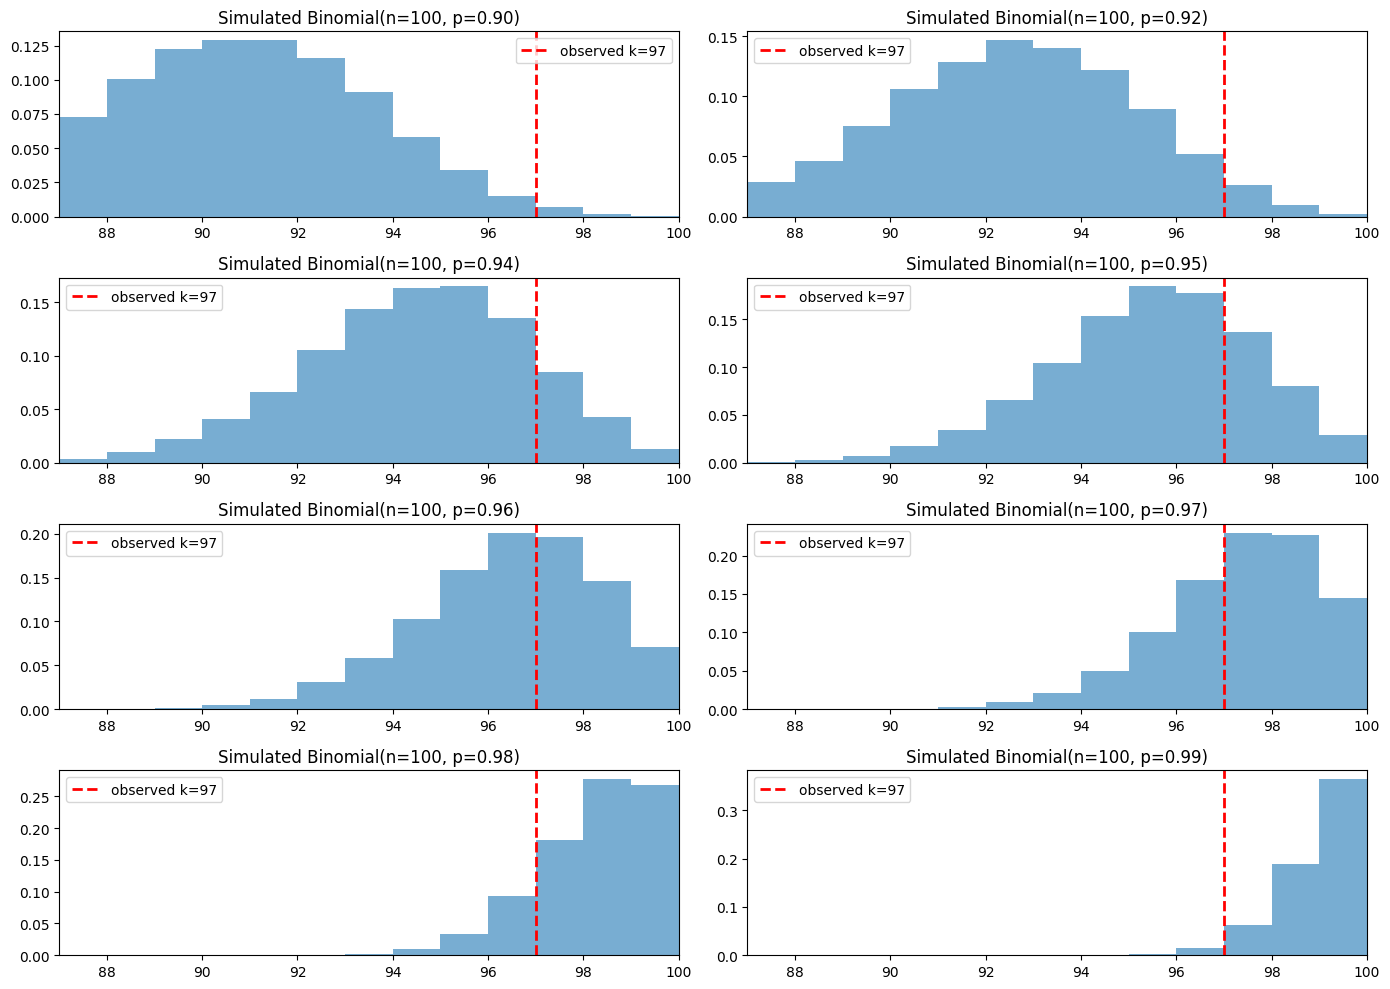

: 

In [ ]:
# Binomial inference for 97 successes out of 100
# Produces histograms, likelihood plot, CI and tail probabilities
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------- observed data ----------
n = 100
k = 97
p_hat = k / n
print(f"Observed: k={k}, n={n}, MLE p̂ = {p_hat:.4f}")

# ---------- helper: binomial pmf using math.comb ----------
def binom_pmf(k, n, p):
    # Avoid 0^0 by handling p==0 or p==1 corner cases
    if p == 0.0:
        return 1.0 if k == 0 else 0.0
    if p == 1.0:
        return 1.0 if k == n else 0.0
    coeff = math.comb(n, k)
    return coeff * (p ** k) * ((1 - p) ** (n - k))

# ---------- candidate p values to examine ----------
candidate_ps = [0.90, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

print("\nLikelihoods and tail probs for candidate p's:")
print("{:>6} {:>14} {:>18} {:>20}".format("p", "PMF (k)", "P(X >= k)", "log-likelihood"))
for p in candidate_ps:
    pmf_k = binom_pmf(k, n, p)
    # cumulative tail P(X >= k)
    tail = sum(binom_pmf(x, n, p) for x in range(k, n+1))
    loglike = math.log(pmf_k) if pmf_k>0 else float("-inf")
    print(f"{p:6.2f} {pmf_k:14.3e} {tail:18.3e} {loglike:20.4f}")

# ---------- simulate histograms for each candidate p ----------
rng = np.random.default_rng(42)
simulations = 20000  # number of simulated experiments per p for smooth histograms

plt.figure(figsize=(14, 10))
cols = 2
rows = math.ceil(len(candidate_ps) / cols)
for i, p in enumerate(candidate_ps, 1):
    sims = rng.binomial(n, p, size=simulations)
    ax = plt.subplot(rows, cols, i)
    ax.hist(sims, bins=range(n+2), density=True, alpha=0.6)
    ax.axvline(k, color='red', linestyle='--', linewidth=2, label=f"observed k={k}")
    ax.set_title(f"Simulated Binomial(n={n}, p={p:.2f})")
    ax.set_xlim(max(0, k-10), min(n, k+10))
    ax.legend()
plt.tight_layout()
plt.savefig("advertising_binomial_hist_simulations.png", dpi=200)
print("\nSaved simulated histograms to 'advertising_binomial_hist_simulations.png'")

# ---------- likelihood over a dense p grid ----------
p_grid = np.linspace(0.85, 1.0, 1001)  # focus around high p values
likelihoods = np.array([binom_pmf(k, n, p) for p in p_grid])

# ---------- Confidence intervals ----------
# normal approx
z = 1.96
se = math.sqrt(p_hat * (1 - p_hat) / n)
ci_normal_low = p_hat - z * se
ci_normal_high = p_hat + z * se

# Wilson interval (better for proportions near 0 or 1)
z2 = z*z
center = (p_hat + z2/(2*n)) / (1 + z2/n)
half = (z / (1 + z2/n)) * math.sqrt((p_hat*(1-p_hat)/n) + (z2/(4*n*n)))
ci_wilson_low = center - half
ci_wilson_high = center + half

print("\nConfidence intervals (95%):")
print(f"Normal approx CI: [{ci_normal_low:.4f}, {ci_normal_high:.4f}]")
print(f"Wilson    CI:     [{ci_wilson_low:.4f}, {ci_wilson_high:.4f}]")

# ---------- p-value style checks: how extreme is k=97 under various p ----------
print("\nOne-sided tail probabilities P(X >= 97):")
for p in candidate_ps:
    tail = sum(binom_pmf(x, n, p) for x in range(k, n+1))
    print(f" p={p:.2f} -> P(X >= 97) = {tail:.4e}")

# ---------- summary ----------
print("\nSummary:")
print(f" - MLE p̂ = {p_hat:.4f}")
print(f" - Normal 95% CI: [{ci_normal_low:.4f}, {ci_normal_high:.4f}]")
print(f" - Wilson 95% CI: [{ci_wilson_low:.4f}, {ci_wilson_high:.4f}]")
print("\nInterpretation tips:")
print(" - The MLE p̂=0.97 is the most likely single value.")
print(" - Likelihood plot shows how plausible nearby p values are (peak near 0.97).")
print(" - Wilson CI is usually preferred; it gives a plausible range for p.")
print(" - Look at P(X>=97) under candidate p to see whether 97 successes is surprising.")
